In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
!pip install pandas matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [4]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Fill missing values
df.fillna({'country':'Unknown'}, inplace=True)
df.fillna({'rating':'Not Rated'}, inplace=True)
df.fillna({'director':'No Director'}, inplace=True)
df.fillna({'cast':'No Cast Info'}, inplace=True)

In [ ]:
# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

# Extract year added to Netflix
df['year_added'] = df['date_added'].dt.year

In [18]:
# Strip spaces safely
for col in ['title', 'type', 'country', 'rating', 'listed_in']:
    df[col] = df[col].astype(str).str.strip()

# Check
print(df.isnull().sum())
print(df.head())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
year_added      10
dtype: int64
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water      No Director   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans      No Director   
4      s5  TV Show           Kota Factory      No Director   

                                                cast        country  \
0                                       No Cast Info  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                       No Cast Info        Unknown   
4  Mayur Mor

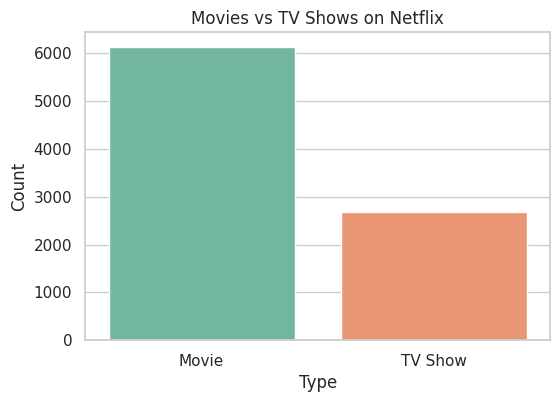

In [20]:
# Count plot for content type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

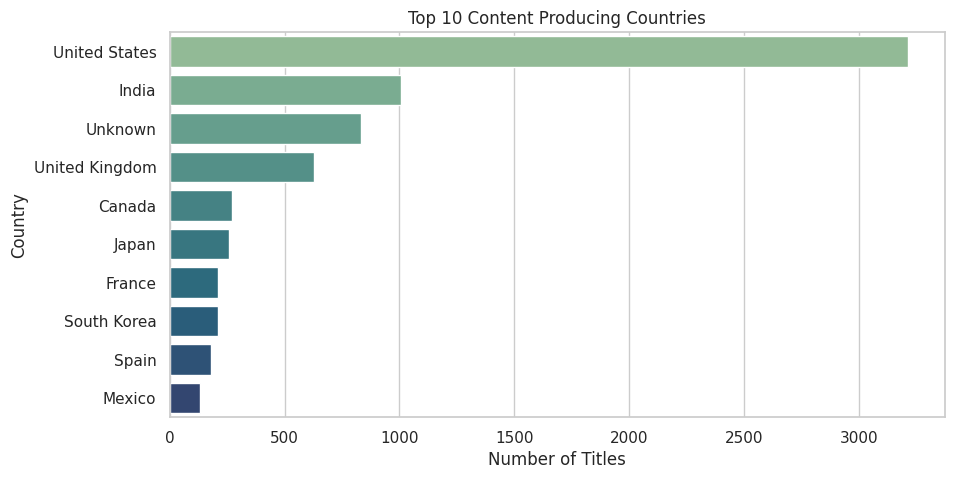

In [21]:
# Extract first country from 'country' field (some have multiple)
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0] if x != 'Unknown' else 'Unknown')

top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


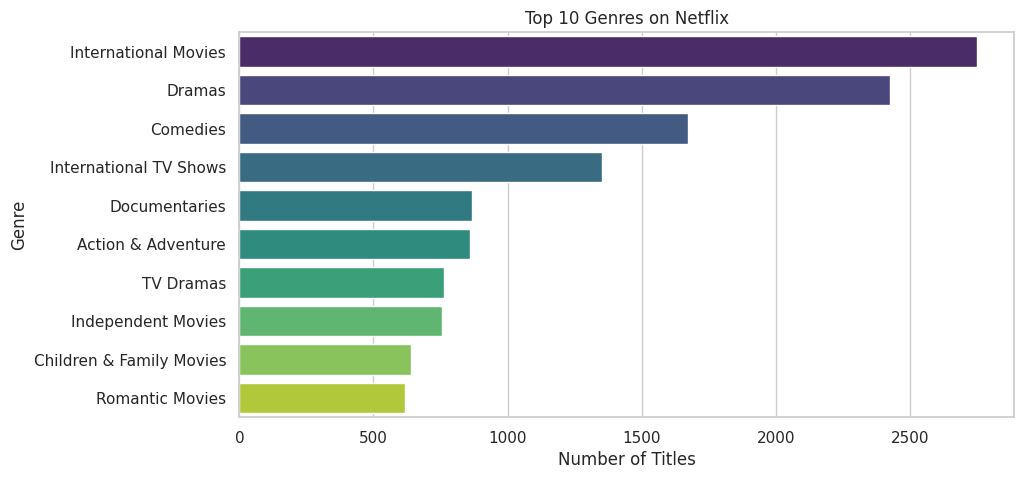

In [22]:
# Split genres and count most frequent
from collections import Counter

genre_list = []
for s in df['listed_in']:
    for g in s.split(','):
        genre_list.append(g.strip())

top_genres = Counter(genre_list).most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


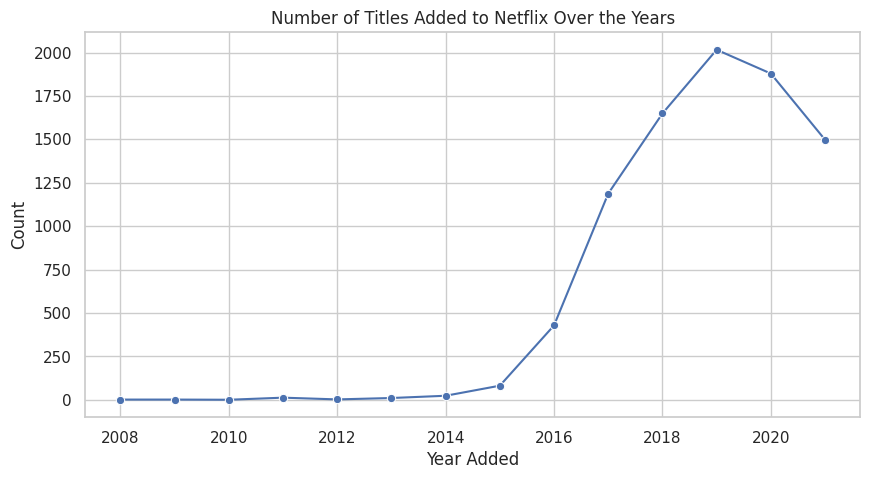

In [23]:
# Filter valid years only
yearly = df[df['year_added'] != 0]['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


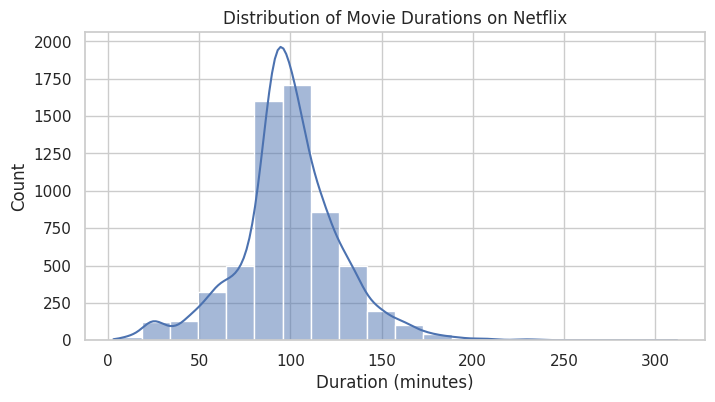

In [24]:
# Filter movie durations like '90 min'
movie_durations = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(str)
movie_durations = movie_durations[movie_durations.str.isnumeric()].astype(int)

plt.figure(figsize=(8,4))
sns.histplot(movie_durations, bins=20, kde=True)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


**Sentiment Analysis**

In [26]:
!pip install nltk textblob

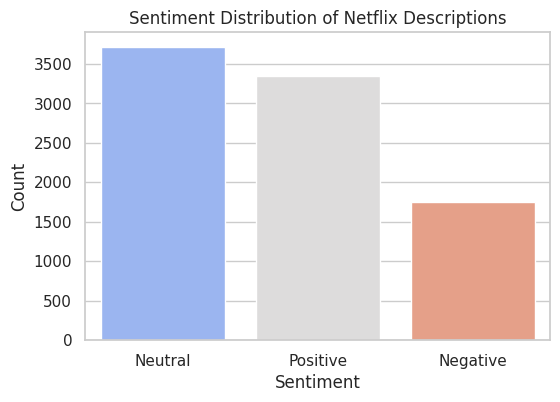

In [27]:
from textblob import TextBlob

# Compute sentiment polarity
df['sentiment_polarity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
def get_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_polarity'].apply(get_sentiment)

# View sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Distribution of Netflix Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Recommender System**

In [28]:
!pip install scikit-learn

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine text features
df['combined_features'] = df['listed_in'] + " " + df['description']

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Index mapping
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def recommend(title, n=5):
    if title not in indices:
        return "Title not found in dataset."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    recommendations = df['title'].iloc[[i[0] for i in sim_scores]]
    return recommendations

# Example
print(recommend("Breaking Bad"))


2606                              Extracurricular
4118                                  Iron Ladies
5352    Have You Ever Fallen in Love, Miss Jiang?
4143                                       Sparta
1559                    The Mess You Leave Behind
Name: title, dtype: object
